In [100]:
import pandas as pd
import numpy as np
import math
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

# Mannucci 2010

In [101]:
html_file = '/Users/Briana/Documents/Grad_School/HPS/Mannucci_table.html'

In [102]:
# cols = ['log(SFR)', '9.10', '9.25', '9.40', '9.55', '9.70', '9.85', '10.00', '10.15', '10.30', '10.45', '10.60', '10.75', '10.90', '11.05', '11.20', '11.35' ]
# df = pd.read_html(html_file, flavor='bs4', header=0)
# df = df[0]
# df.columns = cols

# df.to_csv('/Users/Briana/Documents/Grad_School/HPS/Mannucci_table.csv', index=False)

In [103]:
df = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/Mannucci_table.csv')

In [111]:
met_df = df[0::3]
err_df = df[1::3]
num_df = df[2::3]

met_df.fillna(0, inplace=True)
#print(met_df)

In [112]:
numT = num_df.transpose()
new_header = numT.iloc[0] #grab the first row for the header
numT = numT[1:] #take the data less the header row
numT.columns = new_header #set the header row as the df header
numT.fillna(0, inplace=True)
#print(numT)

In [106]:
mass_names = numT.index.values
mass = numT.index.astype(float).values
sfr = numT.columns.values
print(mass_names)
print(mass)
print(sfr)

['9.10' '9.25' '9.40' '9.55' '9.70' '9.85' '10.00' '10.15' '10.30' '10.45'
 '10.60' '10.75' '10.90' '11.05' '11.20' '11.35']
[ 9.1   9.25  9.4   9.55  9.7   9.85 10.   10.15 10.3  10.45 10.6  10.75
 10.9  11.05 11.2  11.35]
[-1.45 -1.3  -1.15 -1.   -0.85 -0.7  -0.55 -0.4  -0.25 -0.1   0.05  0.2
  0.35  0.5   0.65  0.8 ]


In [113]:
def weighted_avg_and_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def weighted_avg_and_std(values, errors, weights):
    average = np.average(values, weights=weights)
    error = np.average(errors, weights=weights)
    return (average, error)

weighted_sfr = []
weighted_std = []
weighted_met = []
weighted_met_std = []
for m in mass_names:
    weights = numT.loc[m,:]
    avg_sfr, std_sfr = weighted_avg_and_std(sfr, weights)
    met = met_df[m].values
    avg_met, std_met = weighted_avg_and_std(met, weights)
    weighted_sfr.append(avg_sfr)
    weighted_std.append(std_sfr)
    weighted_met.append(avg_met)
    weighted_met_std.append(std_met)

weighted_sfr = np.array(weighted_sfr)
weighted_std = np.array(weighted_std)
weighted_met = np.array(weighted_met)
weighted_met_std = np.array(weighted_met_std)

# print(weighted_sfr)
# print(weighted_std)
# print(weighted_met)
# print(weighted_met_std)

In [110]:
OII_sfr = 0.97*weighted_sfr-0.03
OII_sfr_e = np.sqrt(((weighted_sfr*0.02)**2) + ((0.97*weighted_std)**2) + ((0.02)**2))

np.save('/Users/Briana/Documents/Grad_School/HPS/HPS_dataframes/mannucci_oii_sfr', OII_sfr)
np.save('/Users/Briana/Documents/Grad_School/HPS/HPS_dataframes/mannucci_oii_sfr_error', OII_sfr_e)
np.save('/Users/Briana/Documents/Grad_School/HPS/HPS_dataframes/mannucci_oii_masses', mass)

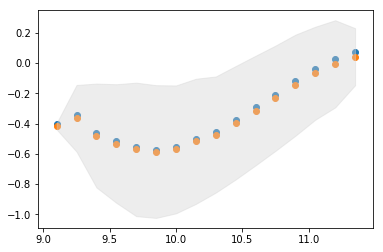

In [109]:
plt.scatter(mass, weighted_sfr)
plt.scatter(mass, OII_sfr)
#plt.fill_between(mass, weighted_sfr+weighted_std, weighted_sfr-weighted_std, color='lightgrey', alpha=1.0)
plt.fill_between(mass, OII_sfr+OII_sfr_e, OII_sfr-OII_sfr_e, color='lightgrey', alpha=0.4)

In [ ]:
#log[SFR([OII])] = (0.97 ± 0.02) log[SFR(Hα)] + (−0.03 ± 0.02)

# Andrews 2013

In [121]:
andrews = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/SDSS_MZR/andrews_flux_table.csv')
andrews_mb = andrews[np.isnan(andrews['logSFRlo'])]

#print(andrews_mb.columns)
#print(andrews_mb.loc[:,['logM*lo', 'logM*up', 'logSFRlo', 'logSFRup', 'Ngal','logM*', 'logSFR',]].head(100))

In [123]:
OII_and_sfr = 0.97*andrews_mb['logSFR']-0.03

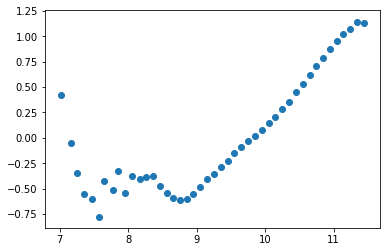

In [124]:
plt.scatter(andrews_mb['logM*'], OII_and_sfr)

# Duarte Puertas 2017

In [125]:
#Duarte Puertas function for log(SFR) from mass (Halpha)
def DP_ha_sfr(mass):
     return -0.03105*(mass**3) + 0.892*(mass**2) - 7.571*mass + 17.71

In [127]:
#Duarte Puertas function for log(SFR) constant as a function of mass (Halpha)
def DP_ha_nu(mass):
    return -0.011*(mass**2) + 0.124*mass + 41.107

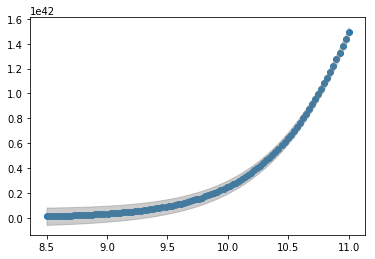

In [165]:
mass = np.linspace(8.5, 11.0, 100)
sfr_ha = DP_ha_sfr(mass)
nu_ha  = DP_ha_nu(mass) 

log_sfr_ha = 10**sfr_ha
log_nu_ha  = 10**nu_ha

Lum_ha = log_sfr_ha * log_nu_ha
Lum_ha_e = log_nu_ha*(0.3)

plt.scatter(mass, Lum_ha)
plt.fill_between(mass, Lum_ha+Lum_ha_e, Lum_ha-Lum_ha_e, color='grey', alpha=0.4)

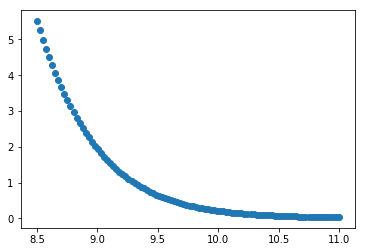

In [163]:
# K98 SFR
k98_sfr = 7.9e-42*Lum_ha
k98_sfr_e = 7.9e-42*Lum_ha_e

log_k98_sfr = np.log10(k98_sfr)
log_k98_sfr_e = 0.434*(k98_sfr_e/k98_sfr)

plt.scatter(mass, k98_sfr_e/k98_sfr)
#plt.scatter(mass, log_k98_sfr)
#plt.fill_between(mass, log_k98_sfr+log_k98_sfr_e, log_k98_sfr-log_k98_sfr_e, color='grey', alpha=0.4)

In [166]:
#log[SFR([OII])] = (0.97 ± 0.02) log[SFR(Hα)] + (−0.03 ± 0.02)

oii_sfr = 0.97*log_k98_sfr - 0.03
oii_sfr_e = np.sqrt(((log_k98_sfr*0.02)**2) + ((0.97*log_k98_sfr_e)**2) + ((0.02)**2))

np.save('/Users/Briana/Documents/Grad_School/HPS/HPS_dataframes/duartepuertas_oii_sfr', oii_sfr)

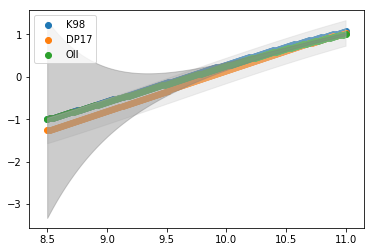

In [158]:
plt.scatter(mass, log_k98_sfr, label='K98')
plt.scatter(mass, sfr_ha, label='DP17')
plt.scatter(mass, oii_sfr, label='OII')
plt.fill_between(mass, sfr_ha+0.3, sfr_ha-0.3, color='lightgrey', alpha=0.4)
plt.fill_between(mass, oii_sfr+oii_sfr_e, oii_sfr-oii_sfr_e, color='grey', alpha=0.4)
plt.legend()